In [8]:
import sys
from importlib import reload
from tqdm import  tqdm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# dir_path='../control_transition'
sys.path.append('../control_transition')

In [4]:
# from rqc.CT_classical import CT_classical
from rqc.CT_quantum import CT_quantum
from rqc.CT_tensor import CT_tensor

In [24]:
import rqc.CT_quantum
reload(rqc.CT_quantum)
from rqc.CT_quantum import CT_quantum

In [124]:
import rqc.CT_tensor
reload(rqc.CT_tensor)
from rqc.CT_tensor import CT_tensor

# CPU

In [139]:
def run(inputs):
    L,p_proj,seed = inputs
    ct_q=CT_quantum(L=L,seed=seed,seed_vec=None,seed_C=None,x0=None,ancilla=False,store_vec=False,store_op=False,store_prob=False,xj=frozenset([0]),)
    for t in range(2*ct_q.L**2):
        ct_q.random_control(p_ctrl=0, p_proj=p_proj,p_global=0)
    MI=ct_q.bipartite_mutual_information(
    np.arange(0,ct_q.L//4),
    np.arange(0,ct_q.L//4)+ct_q.L//2,
    )
    TMI=ct_q.tripartite_mutual_information(
        np.arange(0,ct_q.L//4),
        np.arange(0,ct_q.L//4)+ct_q.L//4,
        np.arange(0,ct_q.L//4)+ct_q.L//2,
    )
    return MI,TMI

In [10]:
L_list = np.array([8,12,])
p_proj_list= np.arange(0.16,0.25,0.01)
seed_list = np.arange(500)

MI_list = np.zeros((L_list.shape[0],p_proj_list.shape[0],seed_list.shape[0]),dtype=float)
TMI_list = np.zeros((L_list.shape[0],p_proj_list.shape[0],seed_list.shape[0]),dtype=float)

for L_idx, L in enumerate(L_list):
    for p_proj_idx,p_proj in tqdm(enumerate(p_proj_list)):
        for seed_idx, seed in enumerate(seed_list):
            MI_list[L_idx,p_proj_idx,seed_idx],TMI_list[L_idx,p_proj_idx,seed_idx]=run((L,p_proj,seed_idx))
            

9it [00:41,  4.57s/it]
9it [05:12, 34.72s/it]


In [11]:
MI_ave_list=MI_list.mean(axis=-1)
TMI_ave_list=TMI_list.mean(axis=-1)

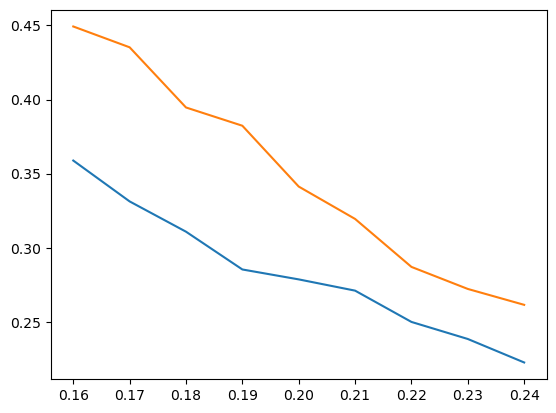

In [12]:
for idx, L in enumerate(L_list):
    plt.plot(p_proj_list, MI_ave_list[idx])

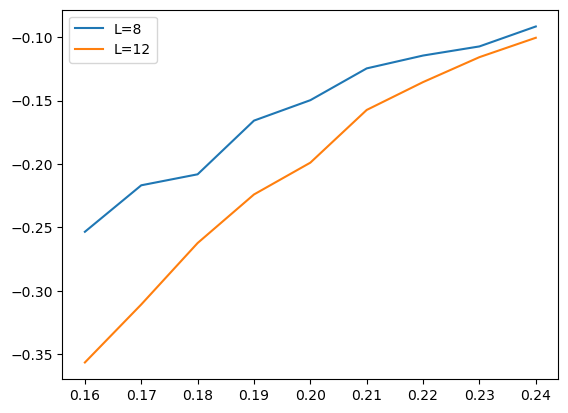

In [13]:
fig,ax=plt.subplots()
for idx, L in enumerate(L_list):
    ax.plot(p_proj_list, TMI_ave_list[idx],label=f'L={L}')
ax.legend()

# Parallel

In [ ]:
# ipcluster start --engines=MPI

In [56]:
from ipyparallel import Client
client = Client()

In [57]:
dview = client[:]

In [58]:
dview.execute('import numpy as np').wait()
dview.execute('import sys').wait()
dview.execute("sys.path.append('../control_transition')").wait()
dview.execute('from rqc.CT_quantum import CT_quantum').wait()


True

In [112]:
L_list = np.array([8,12,16])
p_proj_list= np.arange(0.01,0.27,0.01)
seed_list = np.arange(1000)

In [113]:
inputs= [(L,p_proj,seed) for L in L_list for p_proj in p_proj_list for seed in seed_list]

In [114]:
results = dview.map_async(run, inputs)

In [140]:
results.progress


78000

In [141]:
results.elapsed

527.708596

In [142]:
rs=np.array(list(results)).reshape((L_list.shape[0],p_proj_list.shape[0],seed_list.shape[0],2))

In [143]:
MI_list,TMI_list=rs[:,:,:,0],rs[:,:,:,1]

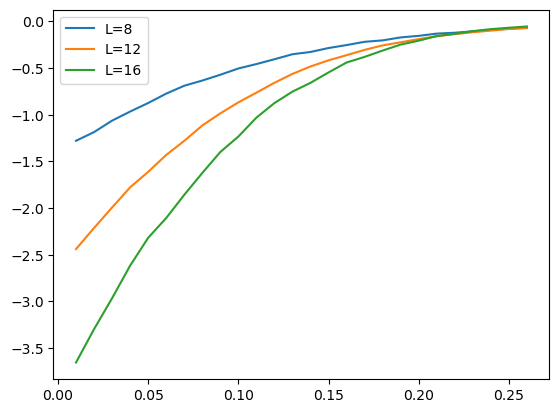

In [144]:
TMI_ave_list=TMI_list.mean(axis=-1)
fig,ax=plt.subplots()
for idx, L in enumerate(L_list):
    ax.plot(p_proj_list, TMI_ave_list[idx],label=f'L={L}')
ax.legend()


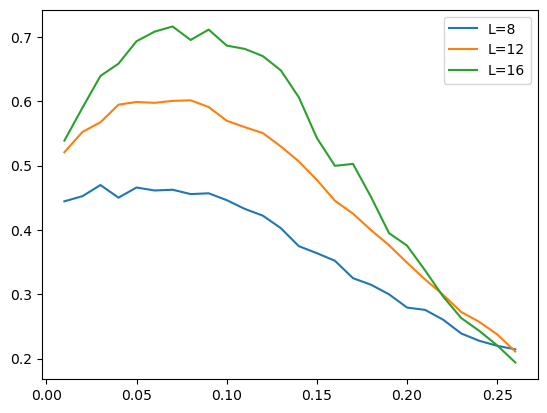

In [155]:
MI_ave_list=MI_list.mean(axis=-1)
fig,ax=plt.subplots()
for idx, L in enumerate(L_list):
    ax.plot(p_proj_list, MI_ave_list[idx],label=f'L={L}')
ax.legend()

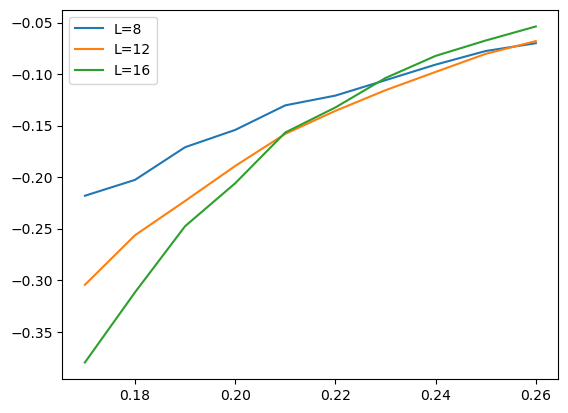

In [ ]:
TMI_ave_list=TMI_list.mean(axis=-1)
fig,ax=plt.subplots()
for idx, L in enumerate(L_list):
    ax.plot(p_proj_list, TMI_ave_list[idx],label=f'L={L}')
ax.legend()

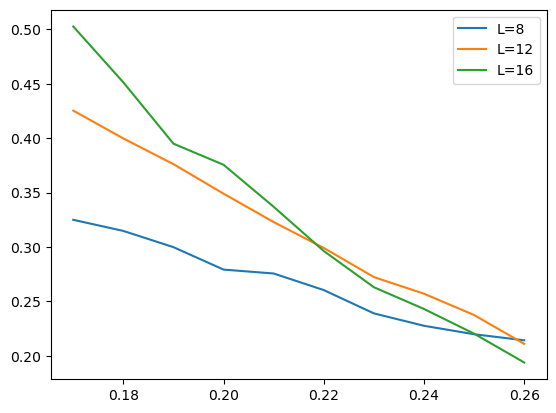

In [ ]:
MI_ave_list=MI_list.mean(axis=-1)
fig,ax=plt.subplots()
for idx, L in enumerate(L_list):
    ax.plot(p_proj_list, MI_ave_list[idx],label=f'L={L}')
ax.legend()

# Tensor

In [151]:
def run_tensor(inputs):
    L,p_proj,seed = inputs
    ct_r=CT_tensor(L=L,seed=seed,seed_vec=None,seed_C=None,x0=None,ancilla=False,store_vec=False,store_op=False,store_prob=False,complex128=False,gpu=True,ensemble=1000,ensemble_m=1,xj=frozenset([0]),)
    for t in range(2*ct_r.L**2):
        ct_r.random_control(p_ctrl=0, p_proj=p_proj,p_global=0)
    MI=ct_r.bipartite_mutual_information(
    np.arange(0,ct_r.L//4),
    np.arange(0,ct_r.L//4)+ct_r.L//2,
    )
    TMI=ct_r.tripartite_mutual_information(
        np.arange(0,ct_r.L//4),
        np.arange(0,ct_r.L//4)+ct_r.L//4,
        np.arange(0,ct_r.L//4)+ct_r.L//2,
    )
    return MI,TMI

In [152]:
MI,TMI=run_tensor((8,0.18,0))

Using cuda


In [153]:
MI

tensor([[0.1684],
        [0.1056],
        [0.2421],
        [0.5459],
        [0.0231],
        [0.5150],
        [0.8698],
        [0.6752],
        [0.4859],
        [0.2258]], device='cuda:0')

In [154]:
TMI

tensor([[-1.4396e-01],
        [-1.7197e-01],
        [-8.5579e-02],
        [-3.0762e-01],
        [-5.6200e-01],
        [-3.8459e-01],
        [-2.9802e-07],
        [-1.5557e-01],
        [-3.7130e-01],
        [-6.2656e-01]], device='cuda:0')

In [126]:
ct_t=CT_tensor(L=12,seed=0,seed_vec=None,seed_C=None,x0=None,ancilla=False,store_vec=False,store_op=False,store_prob=False,complex128=False,gpu=False,ensemble=10,ensemble_m=1,debug=False)

Using cpu


In [130]:
for t in range(2*ct_t.L**2):
    ct_t.random_control(p_ctrl=0, p_proj=p_proj,p_global=0)

In [135]:
MI=ct_t.bipartite_mutual_information(
    np.arange(0,ct_t.L//4),
    np.arange(0,ct_t.L//4)+ct_t.L//2,
    )

In [136]:
MI

tensor([[0.3105],
        [0.5458],
        [0.3108],
        [0.4129],
        [0.1450],
        [1.1341],
        [0.0296],
        [0.5634],
        [0.1571],
        [0.4217]])

# Load

In [2]:
import pickle

In [16]:
# rs={}
# L_list=[8,12,16]
# en_list=[2000,2000,1000]
# for L,en in zip(L_list,en_list):
#     with open(f'CT_MI_En{en}_pctrl(0.00,0.00,1)_pproj(0.00,0.30,31)_L({L},{L+2},2)_xj(0)_seed0_64.pickle','rb') as f:
#         rs[L]= pickle.load(f)
rs[18]={}
for key in ['MI','TMI']:
    rs[18][key]=0*rs[8][key]
    rs[18][key]=rs[16][key][1]

for key in ['MI','TMI']:
    rs[16][key]=rs[16][key][0]

In [22]:
rs[16]['MI'].shape

torch.Size([1, 31, 1000])

In [15]:
rs[16]['MI'][0].shape

torch.Size([1, 31, 1000])

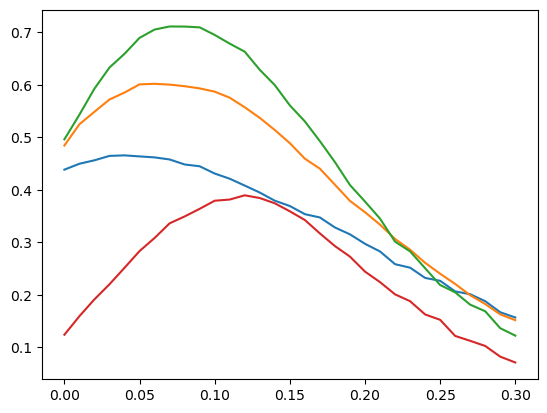

In [19]:
for L in [8,12,16,18]:
    plt.plot(np.linspace(0,0.3,31),rs[L]['MI'].mean(axis=-1).flatten())

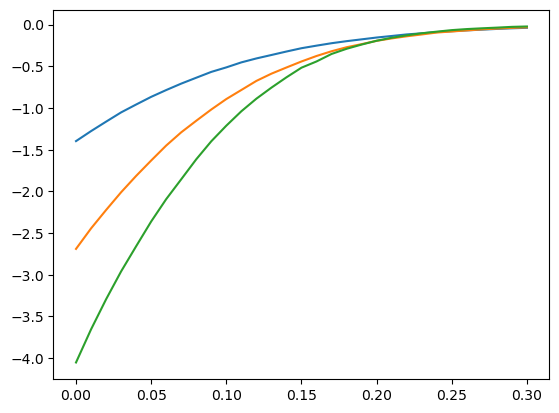

In [21]:
for L in [8,12,16]:
    plt.plot(np.linspace(0,0.3,31),rs[L]['TMI'].mean(axis=-1).flatten())

In [5]:
rs['TMI']

tensor([[[[-1.4164e+00, -1.4488e+00, -1.4060e+00,  ..., -1.3822e+00,
           -1.4234e+00, -1.4262e+00],
          [-1.3846e+00, -1.3365e+00, -1.3648e+00,  ..., -1.4009e+00,
           -1.2938e+00, -1.4854e+00],
          [-1.3846e+00, -1.3365e+00, -8.1372e-01,  ..., -1.3955e+00,
           -8.3437e-01, -1.4399e+00],
          ...,
          [ 4.6752e-07,  2.4868e-34, -8.5688e-02,  ..., -5.0517e-03,
           -6.0819e-02, -9.2875e-02],
          [ 5.5134e-07,  2.3842e-07, -3.1089e-02,  ...,  1.2360e-02,
           -9.4160e-03,  2.0487e-02],
          [ 1.0431e-07, -5.9605e-08, -9.6441e-02,  ...,  2.6497e-04,
           -1.5691e-02, -3.4031e-02]]]])

In [1]:
from run_pytorch import *

In [2]:
run_tensor((8,0,0,frozenset([0]),False,0,False,6,0,False))

Using cuda
tensor([[-1.3999],
        [-1.4905],
        [-1.4409],
        [-1.4207],
        [-1.3524],
        [-1.4092]], device='cuda:0')


(tensor([[0.4638],
         [0.4466],
         [0.4376],
         [0.4416],
         [0.4519],
         [0.4226]], device='cuda:0'),
 tensor([[-1.3999],
         [-1.4905],
         [-1.4409],
         [-1.4207],
         [-1.3524],
         [-1.4092]], device='cuda:0'))

In [ ]:
run_tensor((8,0,0,frozenset([0]),False,0,False,6,0,False))

Using cuda
tensor([[0.0653],
        [0.0502],
        [0.0585],
        [0.0618],
        [0.0732],
        [0.0638]], device='cuda:0')


(tensor([[0.3759],
         [0.3731],
         [0.3716],
         [0.3722],
         [0.3739],
         [0.3691]], device='cuda:0'),
 tensor([[0.0653],
         [0.0502],
         [0.0585],
         [0.0618],
         [0.0732],
         [0.0638]], device='cuda:0'))